In [2]:
!pip install control
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 10.7 MB/s eta 0:00:00


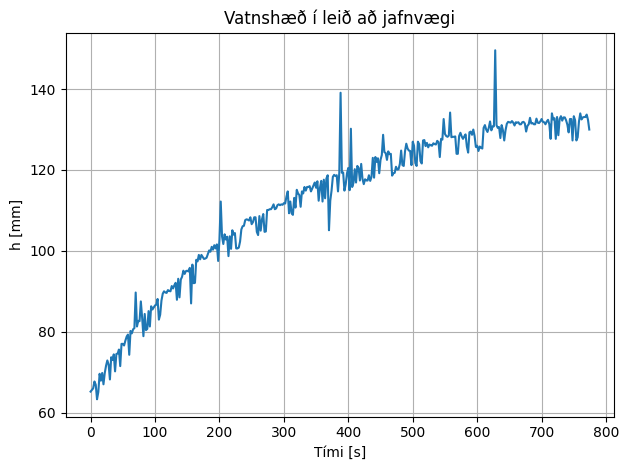

h_eq:  0.13245999999999997
q_inn_eq:  4.6700000000000003e-05
q_ut_eq:  4.7e-05
R:  27564559.62127659
tau_t:  253.64680851063824
K_t:  2818.2978723404253
dq_inn:  2.8533333333333337e-05
dh:  0.07789999999999997
K_m:  2730.1401869158863
tau_m : 235


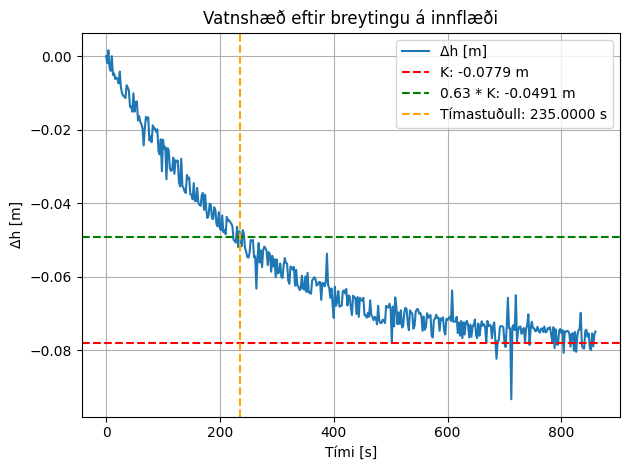

In [4]:

# Hleð inn gögnum úr fyrsta hluta til að reikna R og fræðileg gildi á stuðla yfirfærslufallsins.

data = pd.read_csv('logfile1_1.csv', header=None, names=['q_inn', 'q_ut', 'h'])

q_inn =data['q_inn'].to_numpy()
q_ut = data['q_ut'].to_numpy()
h = data['h'].to_numpy()

dt = 2.0
t_s = dt * np.arange(len(h))

plt.plot(t_s, h)
plt.title('Vatnshæð í leið að jafnvægi')
plt.xlabel('Tími [s]')
plt.ylabel('h [mm]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Reikna meðaltöl síðustu 5 gilda til að jafna út truflanir

h_eq = np.mean(h[-5:]) / 1000           # SI einingar m
q_inn_eq = np.mean(q_inn[-5:]) / 60000  # SI einingar m^3/s
q_ut_eq = np.mean(q_ut[-5:]) / 60000    # SI einingar m^3/s

A = 0.09      # SI einingar m^2
g = 9.81      # SI einingar m/s^2
rho = 997     # SI einingar kg/m^3

R = rho * g * h_eq / q_ut_eq

tau_t = A * R / (rho * g)
K_t = R / (rho * g)

print("h_eq: ", h_eq)
print("q_inn_eq: ", q_inn_eq)
print("q_ut_eq: ", q_ut_eq)
print("R: ", R)
print("tau_t: ", tau_t)
print("K_t: ", K_t)

# Hleð inn gögnum úr hluta tvö til að meta stuðla yfirfærslufallsins út frá mælingum

data = pd.read_csv('logfile1_2.csv', header=None, names=['q_inn', 'q_ut', 'h'])

q_inn =data['q_inn'].to_numpy()
q_ut = data['q_ut'].to_numpy()
h = data['h'].to_numpy()

dt = 2.0
t_s = dt * np.arange(len(h))

dh_m = (h - h[0])/1000

dq_inn = q_inn_eq - np.mean(q_inn[-5:]) / 60000  # SI einingar m^3/s
dh = h_eq - np.mean(h[-5:]) / 1000               # SI einingar m

print("dq_inn: ", dq_inn)
print("dh: ", dh)

K_m = dh / dq_inn
tau_m = 235         # SI einingar s (les út frá grafi)

print("K_m: ", K_m)
print("tau_m :", tau_m)

tau_level = -0.63 * dh

plt.plot(t_s, dh_m, label='Δh [m]')
plt.title('Vatnshæð eftir breytingu á innflæði')
plt.axhline(y=-dh, color='r', ls='--', label=f'K: {-dh:.4f} m')
plt.axhline(y=tau_level, color='g', ls='--', label=f'0.63 * K: {tau_level:.4f} m')
plt.axvline(x=tau_m, color='orange', ls='--', label=f'Tímastuðull: {tau_m:.4f} s')
plt.xlabel('Tími [s]')
plt.ylabel('Δh [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





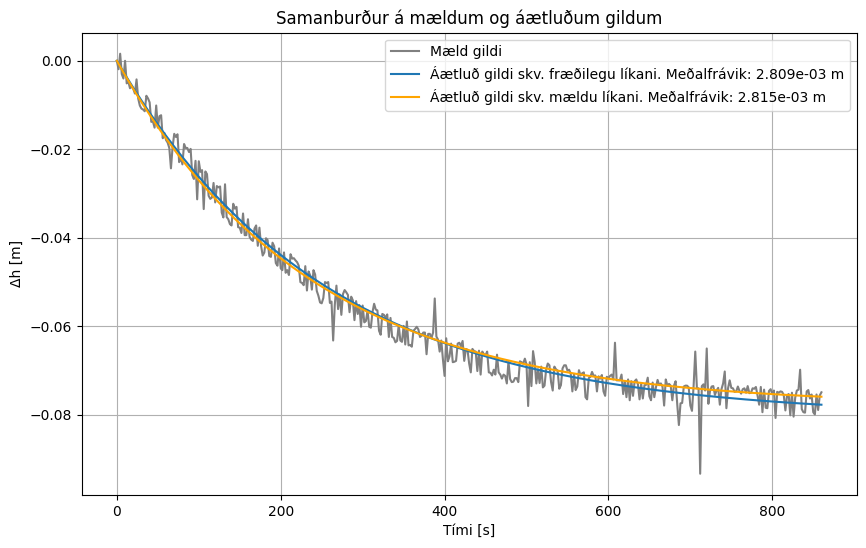

In [22]:
# Samanburður milli mældra og áætlaðra gilda

# reiknað meðalfrávik frá mældum gögnum

e_t = np.sqrt(np.mean((dh_m - (-dq_inn * y1))**2))  # fyrir fræðilegt líkan
e_m = np.sqrt(np.mean((dh_m - (-dq_inn * y2))**2))  # fyrir mælt líkan

fig, ax = plt.subplots(figsize=(10, 6))

# mæld gögn

ax.plot(t_s, dh_m, label="Mæld gildi", color="gray")

# Fræðileg svörun við breytingu í innflæði.

G_t = ct.tf([K_t], [tau_t, 1.])
t1, y1 = ct.step_response(G_t, t_s)
ax.plot(t1, -dq_inn * y1, label=f'Áætluð gildi skv. fræðilegu líkani. Meðalfrávik: {e_t:.3e} m')  # margfalda með -dq_inn til að fá raungildi

# mæld svörun við breytingu í innflæði

G_m = ct.tf([K_m], [tau_m, 1.])
t2, y2 = ct.step_response(G_m, t_s)
ax.plot(t2, -dq_inn * y2, color="orange", label=f'Áætluð gildi skv. mældu líkani. Meðalfrávik: {e_m:.3e} m' )   # margfalda með -dq_inn til að fá raungildi


ax.set_xlabel("Tími [s]")
ax.set_ylabel("Δh [m]")
ax.grid(True)
ax.legend()
plt.title("Samanburður á mældum og áætluðum gildum")
plt.show()



